![title](header.png)

## Introduction

Pandas comes with some neat functions that are essential to know for importing data into Python. We will take a quick look at the two main file types you will recieve data in - CSV and Excel Files, and how to import them as pandas dataframes.

## Importing CSV Files

CSV files (known as Comma Seperated Value Files) are a common format to see data in. Pandas has a built in method for importing this data. For this example, we will be using the example files found [here](https://github.com/stmball/HiPy-2017/tree/master/Importing%20Files%20With%20Pandas) - you will need to download this file to see the example code below work, or you can find your own CSV files and try it for yourself. Note that Python looks by default at the directory the notebook file is in - so try and keep the jupyter notebook file and all imported files in the same folder! The command for this to work is as follows:

In [3]:
import numpy as np
import pandas as pd

df = pd.read_csv('example.csv')

print(df)

    a   b   c   d
0   0   1   2   3
1   4   5   6   7
2   8   9  10  11
3  12  13  14  15


We can also use the same function to skip downloading CSV files and passing the arguement of the download link to the read_csv function:

In [8]:
df = pd.read_csv('https://local-authority-eng.register.gov.uk/records.csv?page-size=5000')

print(df.head())

   index-entry-number  entry-number       entry-timestamp  key  \
0                 357           357  2017-01-26T12:34:10Z  KIN   
1                 356           356  2016-11-01T14:16:54Z  GLA   
2                 355           355  2016-10-31T12:59:03Z  LND   
3                 354           354  2016-10-21T16:11:20Z  WOT   
4                 353           353  2016-10-21T16:11:20Z  MSS   

  local-authority-eng local-authority-type                          name  \
0                 KIN                  NMD  King's Lynn and West Norfolk   
1                 GLA                  SRA                Greater London   
2                 LND                   CC                City of London   
3                 WOT                  NMD                      Worthing   
4                 MSS                  NMD                    Mid Sussex   

                                     official-name  start-date  end-date  
0  Borough Council of King's Lynn and West Norfolk         NaN       Na

## Importing Excel Files

Excel files can be imported into Python very easily using the following function - the file we're targeting can be found [here](https://github.com/stmball/HiPy-2017/tree/master/Importing%20Files%20With%20Pandas).

In [10]:
df = pd.read_excel('Excel_Sample.xlsx',sheetname='Sheet1')
print(df)

   a  b  c  d
0  0  1  0  1
1  1  0  1  0
2  0  1  0  1
3  1  0  1  0


## Worked Example

We're going to work with the local authoity CSV, cleaning it up ready for some very basic analysis.

First, we're going to load in our modules and import our data:

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('https://local-authority-eng.register.gov.uk/records.csv?page-size=5000')

print(df.head())

   index-entry-number  entry-number       entry-timestamp  key  \
0                 357           357  2017-01-26T12:34:10Z  KIN   
1                 356           356  2016-11-01T14:16:54Z  GLA   
2                 355           355  2016-10-31T12:59:03Z  LND   
3                 354           354  2016-10-21T16:11:20Z  WOT   
4                 353           353  2016-10-21T16:11:20Z  MSS   

  local-authority-eng local-authority-type                          name  \
0                 KIN                  NMD  King's Lynn and West Norfolk   
1                 GLA                  SRA                Greater London   
2                 LND                   CC                City of London   
3                 WOT                  NMD                      Worthing   
4                 MSS                  NMD                    Mid Sussex   

                                     official-name  start-date  end-date  
0  Borough Council of King's Lynn and West Norfolk         NaN       Na

We're going to create a new dataframe with just the local authority code.

In [16]:
df = df['local-authority-eng'] #selecting the local authority code
print(df.head())

0    KIN
1    GLA
2    LND
3    WOT
4    MSS
Name: local-authority-eng, dtype: object


So we now have a list of all local authority codes in the UK. Let's try and get a frequency chart of the first letter of each authority's code. There are a lot of different ways of doing this, we will be using the most clear way - first we define a function that returns the first letter of the local authority code, then we use the ".apply" method to run this function on every entry in our series above:

In [17]:
def getFirstLetter(string):
    return string[0]

counts = df.apply(getFirstLetter)

Then we use the ".value_counts" method to count how many times each letter appears:

In [18]:
counts = counts.value_counts()
counts

S    52
W    38
B    35
C    30
N    26
H    25
E    21
R    19
T    18
M    15
L    14
D    13
G    10
K     8
A     7
P     7
F     5
O     4
I     4
V     1
U     1
Y     1
Name: local-authority-eng, dtype: int64

Finally, we <i>could</i> use matplotlib to graph the frequency charts of each letter - but a quicker and easier way to do this is to use panda's built in visualisation - we'll see how to use this later:

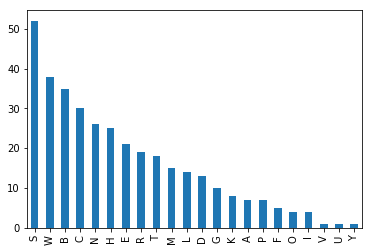

In [19]:
counts.plot.bar()
plt.show()

Cool! Do you think there's a reason that S is the most common letter? (If you have an idea, test it out using python!)

## Mini Project

The Feburary costs of the Department of Education over £25,000 can be found at this link (https://www.gov.uk/government/uploads/system/uploads/attachment_data/file/594112/DfE_and_EFA_Spend_January_2017.csv) in csv format. Can you find out how much money the Department of Education spent in Feburary (in costs of over £25000)? Can you break these down by the expense type, or supplier? (Hint: Look at the groupby function) 

## More information 

* Govenment data found at: https://data.gov.uk/
* Pandas documentation: http://pandas.pydata.org/pandas-docs/stable/